# Ajuste de curva de las series temporales
## Se realiza un ajuste de datos atípicos reemplazando por el valor de la media móvil de los mismos

### Se importan los módulos necesarios y se configura la visualización de dataframes a 10 filas

In [1]:
import funs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10

### Se importan los datos de las mediciones.
### Se tienen mediciones de las siguietes variables:
TEMPERATURA; HUMEDAD RELATIVA; HUMEDAD DE LA TIERRA; NIVEL UV; INTENSIDAD LUMÍNICA; HORA

In [2]:
# Los datos del archivo mediciones_cacao_n5.csv se cargan en el
# DataFrame mediciones_cacao
mediciones_cacao = pd.read_csv('mediciones_cacao_n5.csv')
# Convierte a Timestamp la columna TIME
mediciones_cacao.TIME = [pd.Timestamp(x) for x in mediciones_cacao['TIME']]
# Define la variable que se va a analizar
variable='INTENSIDAD LUMÍNICA'
# Presenta el dataframe mediciones_cacao
mediciones_cacao

,TEMPERATURA,HUMEDAD RELATIVA,HUMEDAD DE LA TIERRA,NIVEL UV,INTENSIDAD LUMÍNICA,HORA,TIME
0,30,58,80.42,0,5829,10,2018-05-09 10:25:00
1,30,57,73.20,0,5829,10,2018-05-09 10:26:00
2,30,57,67.75,0,5841,10,2018-05-09 10:27:00
3,30,57,63.25,0,5824,10,2018-05-09 10:28:00
4,30,56,58.92,0,5835,10,2018-05-09 10:29:00
...,...,...,...,...,...,...,...
11766,33,29,6.59,1,5865,6,2018-06-11 06:13:00
11767,33,29,6.43,1,5865,6,2018-06-11 06:14:00
11768,33,29,6.43,1,5865,6,2018-06-11 06:15:00
11769,33,29,6.43,0,5865,6,2018-06-11 06:16:00


               inicio                 fin  datos
0 2018-05-09 10:26:00 2018-05-10 14:37:00   1673
1 2018-05-23 10:09:00 2018-05-26 08:34:00   4202
2 2018-06-05 07:22:00 2018-06-09 03:39:00   4874
3 2018-06-09 06:05:00 2018-06-10 18:54:00    989
4 2018-06-10 21:04:00 2018-06-10 21:40:00     11
5 2018-06-11 06:02:00 2018-06-11 06:16:00     15


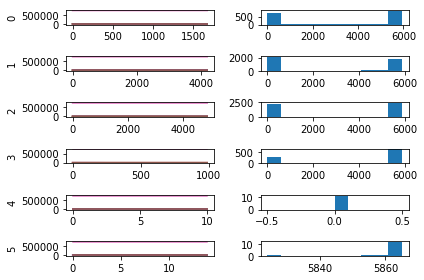

In [8]:
mediciones,duracion=funs.separa_datos(mediciones_cacao,60)
print(duracion)
n=0
for i in range(len(mediciones)):
    n += 1
    plt.subplot(len(mediciones),2,n)
    n += 1
    plt.plot(mediciones[i][variable])
    plt.ylabel(i)
    plt.subplot(len(mediciones),2,n)
    plt.hist(mediciones[i][variable])
plt.tight_layout()

In [4]:
#medicion=mediciones[2].copy()
medicion=mediciones_cacao


count    11771.000000
mean      2976.408461
std       2831.738868
min          0.000000
25%          0.000000
50%       4152.000000
75%       5812.000000
max       5935.000000
Name: INTENSIDAD LUMÍNICA, dtype: float64

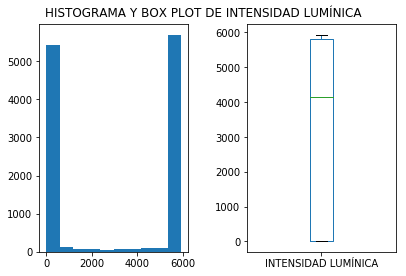

In [5]:
plt.subplot(121)
# Presenta la distribución de los datos en un histograma
plt.hist(medicion[variable])
# Asigna un título a la figura
plt.suptitle('HISTOGRAMA Y BOX PLOT DE %s' %variable)
plt.subplot(122)
# Presenta la grafica de cajas de la variable
pd.DataFrame(medicion[variable]).boxplot(grid=False)
plt.tight_layout(pad=2)
medicion[variable].describe()

Resumen estadístico de la desviación estandar móvil de INTENSIDAD LUMÍNICA
count    11712.000000
mean       202.145428
std        531.146315
min          0.000000
25%          0.000000
50%         10.472926
75%         24.580319
max       2884.846890
Name: INTENSIDAD LUMÍNICA, dtype: float64


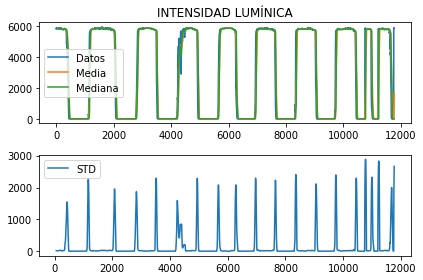

In [6]:
plt.subplot(211)
# Grafica la variable
plt.plot(medicion[variable],label='Datos')
plt.title('%s' %variable)
# Define el tamaño de la ventana delizante
ventana=60
# Calcula media móvil de la variable
rolling_mean=medicion[variable].rolling(ventana).mean()
# Grafica la media móvil
rolling_mean.plot(label='Media')
# Calcula media móvil de la variable
rolling_median=medicion[variable].rolling(ventana).median()
# Grafica la media móvil
rolling_median.plot(label='Mediana')

plt.legend()
plt.subplot(212)
# Calcula desviación estadar móvil de la variable
rolling_std=medicion[variable].rolling(ventana).std()
# Grafica de la desviación estandar móvil
rolling_std.plot(label='STD')
print('Resumen estadístico de la desviación estandar móvil de %s' %variable)
print(rolling_std.describe())

plt.legend()
# Permite visualizar el resumen estadístico de la variableiable
medicion[variable].describe()
plt.tight_layout()

No se asegura la eliminación de los outliers cuando se presentan seguidos, en el mismo periodo de tiempo.
Tener en cuenta cuando se presenta variación y los valores se mantienen en un nuevo rango.

C:\Users\Jergb\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


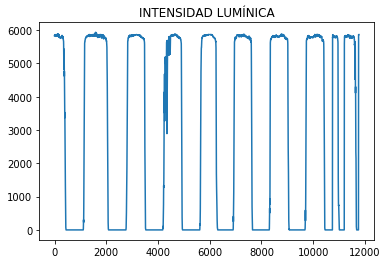

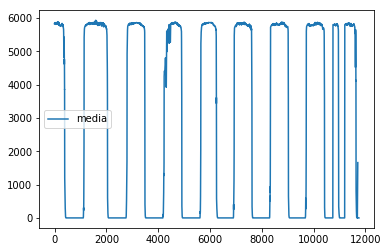

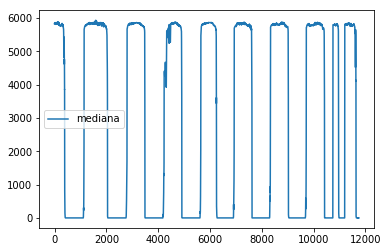

In [7]:
nvalores=medicion[variable][(rolling_std>rolling_std.std())].index.values

plt.plot(medicion[variable])
plt.title(variable)
plt.figure()
suave=medicion[variable].copy()
suave[nvalores]=rolling_mean[nvalores+ventana]
plt.plot(suave,label='media')
plt.legend()
plt.figure()
suavem=medicion[variable].copy()
suavem[nvalores]=rolling_median[nvalores+ventana]
plt.plot(suavem,label='mediana')
plt.legend()